#Import

In [ ]:
# CASO o arquivo esteja solto em \content:

# 0.1.0
# !pip  install eeos-0.1.0-cp311-cp311-manylinux_2_34_x86_64.whl
# !pip  install --force-reinstall eeos-0.1.0-cp311-cp311-manylinux_2_34_x86_64.whl

# 0.1.1
!pip  install eeos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl
# !pip  install --force-reinstall eeos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl

# Se estiver em outro diretório, copiar o endereço e fazer:
# !pip install '\enreço\ate\eeos-0.1.0-cp311-cp311-manylinux_2_34_x86_64.whl' "


Processing ./eeos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl


In [ ]:
# from eeos import CPAEquationOfState
# from eeos import StateCPA

# from eeos import EquationOfState,State,CPAParameters,PhaseEquilibrium,CubicRecord,AssociationRecord

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


: 

#Parâmetros

##JSON

In [ ]:

# parametros konteo
json=r'''{
    "components": {

        "CO2": {
            "name": "CO2",

            "cubic":{
                "a0":      0.35079,
                "b":   0.0272e-3,
                "tc":          304.12,
                "c1":      0.7602
            },
            "assoc":{

                "solvation":{
                    "scheme":"S1B"
                }
            }
        },
        "OCTANE": {
            "name": "OCTANE",

            "cubic":{
                "a0":   34.8750e-1,
                "b":   0.1424e-3,
                "tc":   568.7,
                "c1":   0.99415
            }

        },


        "HEPTANE": {
            "name": "HEPTANE",
            "cubic":{
                "a0":   29.17800e-1,
                "b":   0.125350e-3,
                "tc":   540.0,
                "c1":   0.913700
            }

        },

        "CH4": {
            "name": "CH4",

            "cubic":{
                "a0": 0.23203,
                "b": 0.0291e-3,
                "tc": 190.56,
                "c1": 0.4472
            }

        },

        "METHANOL":{
            "name": "METHANOL",

            "cubic":{
                "a0":  0.40531,
                "b":  0.000031,
                "tc": 512.64,
                "c1": 0.4310
            },
            "assoc":{
                "associative":{
                    "epsilon":24591.0,
                    "beta":0.01610,
                    "scheme":"2B"
                }
            }
        },

        "PROPANOIC":{
            "name": "PROPANOIC",

            "cubic":{
                "a0":  1.32676,
                "b":  0.0641e-3,
                "tc": 612.2,
                "c1": 0.6891
            },
            "assoc":{
                "associative":{
                    "epsilon":399.75e2,
                    "beta":2.1e-3,
                    "scheme":"1A"
                }
            }
        },
        "ACETIC":{
            "name": "ACETIC",

            "cubic":{
                "a0":  0.91196,
                "b":  0.0468e-3,
                "tc": 594.8,
                "c1": 0.4644
            },
            "assoc":{
                "associative":{
                    "epsilon":403.23e2,
                    "beta":4.5e-3,
                    "scheme":"1A"
                }
            }
        },
        "FORMIC":{
            "name": "FORMIC",

            "cubic":{
                "a0":  5.6336e-2,
                "b":  3.0e-5,
                "tc": 580.0,
                "c1": 0.3338
            },
            "assoc":{
                "associative":{
                    "epsilon":419.17e2,
                    "beta":15.5e-3,
                    "scheme":"1A"
                }
            }
        },

        "WATER": {
            "name": "WATER",

            "cubic":{
                "a0":  0.12277,
                "b":  0.0145e-3,
                "tc": 647.14,
                "c1": 0.6736
            },
            "assoc":{
                "associative":{
                    "epsilon":166.55e2,
                    "beta":0.0692,
                    "scheme":"4C"
                }
            }

        }
    },

    "binary": {

        "WATER_CO2": {
            "kij_a":0.000877,
            "kij_b":-0.15508,

            "assoc":{
                "solvation":{
                    "rule":"mcr1",
                    "epsilon_cross": 83.28e2,
                    "beta_cross":  0.1836
                }
            }
        },

        "ACETIC_OCTANE":{
            "kij":0.064,
            "kij_t":false

        },
        "PROPANOIC_HEPTANE":{
            "kij":0.017,
            "kij_t":false

        },

        "WATER_ACETIC": {
            "kij_a":  0.0,
            "kij_b":  -0.222,

            "assoc":{
                "normal":{
                    "rule":"ecr"
                }
            }
          },
        "ACETIC_METHANOL": {
            "kij_a":  0.0,
            "kij_b":  -0.04,

            "assoc":{
                "normal":{
                    "rule":"ecr"
                }
            }
          },

        "WATER_METHANOL": {
            "kij_a":0.0,
            "kij_b":  -0.108,

            "assoc":{
                "normal":{
                    "rule":"ecr"
                }

            }
        }
    }
}'''

##RECORDS

In [ ]:
c_co2=CubicRecord(
    a0=0.35079,
    b=0.0272e-3,
    c1=0.7602,
    tc=304.12,
)
c_ch4=CubicRecord(
    a0=0.23204,
    b=0.0291e-3,
    c1=0.447,
    tc= 190.56,
)
c_w=CubicRecord(
    a0= 0.12277,
    b=0.0145e-3,
    c1=0.6736,
    tc=647.14,
)

c_acoh=CubicRecord(
    a0= 0.91196,
    b=0.0468e-3,
    c1=0.4644,
    tc=594.8,
)
# antes
c_propanoic=CubicRecord(
    a0= 1.326756,
    b=0.06406e-3,
    c1= 0.68908,
    tc= 612.2,
)
c_methanol_2b=CubicRecord(
    a0= 0.40531,
    b=0.0000309,
    c1=0.4310,
    tc=513.,
)
c_methanol_3b=CubicRecord(
    a0= 4.5897e-1,
    b= 0.0334e-3,
    c1=1.0068,
    tc=513.,
)

c_octanol_2b=CubicRecord(
    a0= 4.15822,
    b=0.1485e-3,
    c1=1.1486,
    tc=655.5,
)
c_octanol_3b=CubicRecord(
    a0= 41.9005e-1,
    b= 0.1489e-3,
    c1= 1.0550,
    tc=655.5,
)
c_octane=CubicRecord(
    a0= 34.8750e-1,
    b=0.1424e-3,
    c1= 0.99415,
    tc=568.7,
)
c_heptane=CubicRecord(
    a0= 29.17800e-1,
    b=0.125350e-3,
    c1= 0.913700,
    tc=540.0,
)


a_co2=AssociationRecord.solvate(
    b=0.0272e-3,
    na=0,
    nb=1,
    nc=0)

a_w=AssociationRecord.associative(
    eps=166.55e2,
    beta=0.0692,
    b=0.0145e-3,
    na=2,
    nb=2,
    nc=0)

a_acoh=AssociationRecord.associative(
    eps=403.23e2,
    beta=4.5e-3,
    b=0.0468e-3,
    na=0,
    nb=0,
    nc=1)

a_methanol_2b=AssociationRecord.associative(
    eps=24591.0,
    beta=0.01610,
    b=0.0000309,
    na=1,
    nb=1,
    nc=0)

a_methanol_3b=AssociationRecord.associative(
    eps=160.70e2,
    beta=34.4e-3,
    b= 0.0334e-3,
    na=2,
    nb=1,
    nc=0)

a_propanoic=AssociationRecord.associative(
    eps=399.746e2,
    beta=2.07e-3,
    b= 0.06406e-3,
    na=0,
    nb=0,
    nc=1)

a_octanol_2b=AssociationRecord.associative(
    eps=267.59e2,
    beta=0.14e-3,
    b= 0.1485e-3,
    na=1,
    nb=1,
    nc=0)
a_octanol_3b=AssociationRecord.associative(
    eps=250.00e2,
    beta= 0.2e-3,
    b= 0.1489e-3,
    na=2,
    nb=1,
    nc=0)

a_octane=AssociationRecord.inert(0.1424e-3)
a_heptane=AssociationRecord.inert(0.125350e-3)
a_ch4=AssociationRecord.inert(0.0291e-3)


# tudo do NIST
# log10, P/BAR,T/Kelvin

water_antoine= np.array([6.20963,2354.731,  7.559])
acoh_antoine=np.array([4.68206, 1642.54,    -39.764 ])
co2_antoine=np.array([6.81228,  1301.679,   -3.494])

octane_antoine=np.array([4.04867    ,1355.126   ,-63.633    ])
propanoic_antoine=np.array([4.74558 ,1679.869,  -59.832])

heptane_antoine=np.array([4.02832   ,1268.636   ,-56.199])

octanol_antoine=np.array([6.47682   ,2603.359   ,-48.799    ])
metoh_antoine=np.array([5.20409,    1581.341,   -33.50])

## Algoritmos VLE

In [ ]:
a,b=("t",300)
b

300

In [ ]:
def vle_diagram(T,phase_eq,N=100,factor=1e5):
  vx=np.linspace(0.00001,0.9999,N)
  calc_p=np.zeros_like(vx)
  calc_vy=np.zeros_like(vx)

  for i in range(len(vx)):

      try:
        x=np.array([vx[i],1-vx[i]])
        # p,y,*_=BubblePy(eos,T,x,guess_p,guess_y) #calculado em Pa
        p,y=phase_eq.bbpy(T,x,tol_p=1e-6,tol_y=1e-6)
        # print(p)
        calc_p[i]=p/factor #armazena em bar
        calc_vy[i]=y[0] #composição de acido acetico

      except Exception as e:
        print(e)
        continue

  return [calc_p,calc_vy,vx]

def VLE_DIAGRAM(p_or_t,
                peq,antoine,
                y_label,
                x_label,
                title,
                exp_data=None,
                factor=1.0,
                y_lim=None,
                x_figsize=5,
                y_figsize=5,
                N_points=100):

  '''
  P_or_T: tupla ; ex: ("t",300) em Kelvin; ("p",500) em bar
  '''

  var_str,var=p_or_t

  # print(var_str,var)
  linspaceZ=np.linspace(0.00001,0.9999,N_points)
  BOL=np.zeros_like(linspaceZ)
  XPHASE=np.zeros_like(linspaceZ)

  for (i,z1) in enumerate(linspaceZ):

    try:
      z=np.array([z1,1-z1])
      # print(z)

      # print(z)
      calc_bol,x1=tpd_root_(var_str,var,z,"vapor",peq ,antoine)
      # calc_bol,x1=tpd_root_(var_str,var,z,"vapor",peq ,antoine)
      # calc_orv=tpd_root_(var_str,var,z,"liquid",peq,antoine)
      # print('z=',z,'var=',var)
      # print('Tbol=',calc_bol)
      # print('x1=',x1)
      BOL[i]=calc_bol/factor
      XPHASE[i]=x1
    except Exception as e:
      print(e)
    # ORV[i]=calc_orv/factor

  if y_lim==None:
    y_sup=np.max(BOL)*1.1
    y_inf=np.min(BOL)*0.9
  else:
    y_sup=y_lim[1]
    y_inf=y_lim[0]


  #   y_sup=y_sup*1.01
  #   y_inf=0.0
  # else:
  #   y_sup=y_lim[1]
  #   y_inf=y_lim[0]

  # Fig


  # ORV
  # plt.scatter(XPHASE,BOL)
  if exp_data!=None:
    plt.figure(figsize=(x_figsize, y_figsize))
    plt.xlim(0,1.0)
    plt.ylim(y_inf,y_sup)
    xorv,orv,xbol,bol=exp_data

    plt.plot(XPHASE,BOL)
    plt.scatter(xorv,orv)
    # BOL
    # plt.scatter(linspaceZ, BOL)
    plt.plot(linspaceZ, BOL)
    plt.scatter(xbol,bol)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)

    plt.show()
  else:
    plt.figure(figsize=(x_figsize, y_figsize))
    plt.xlim(0,1.0)
    plt.ylim(y_inf,y_sup)
    plt.plot(XPHASE,BOL)
    # BOL
    # plt.scatter(linspaceZ, BOL)
    plt.plot(linspaceZ, BOL)


    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)

    plt.show()

  return BOL,XPHASE,linspaceZ
def psat_antoine(T,v):

  psats=np.zeros(len(v))

  for (i,vec) in enumerate(v):
    a,b,c=vec[0],vec[1],vec[2]

    log=a-b/(T+c)

    psats[i]=(10**log)*1e5

  return psats

def tsat_antoine(P,v):

  tsats=np.zeros(len(v))

  for (i,vec) in enumerate(v):

    a,b,c=vec[0],vec[1],vec[2]

    tsats[i]=b/(a-np.log10(P*1e-5))-c

  return tsats

def tpd_root_(tp,
              var,
              z,
              incipient_phase,
              peq:PhaseEquilibrium,
              antoine):


  #Se fixo T, então é P-VLE
  if tp=="t":
    T=var
    psat=psat_antoine(T,antoine)

    if incipient_phase=="vapor":

      x0=z.dot(psat)
      incipient_phase_guess=(z*psat)/x0


    else:
      x0=(z.dot(1/psat))**-1
      incipient_phase_guess=x0*(z/psat)


    F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
    F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]


  #Se fixo P, então é T-VLE

  elif tp=="p":
    P=var
    tsat=tsat_antoine(P,antoine)

    # print("P=",P)
    # print(tsat)
    if incipient_phase=="vapor":

      x0=z.dot(tsat)
      incipient_phase_guess=(z*tsat)/x0



    else:
      x0=(z.dot(1/tsat))**-1
      incipient_phase_guess=x0*(z/tsat)

    # print(x0,incipient_phase_guess)

    # !!!
    # incipient_phase_guess=np.array([0.5,0.5])

    F=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-10,it_max=200)[0]
    F_return_x=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-10,it_max=200)[1]


  else:
    return "t_ou_p"



  # print(psat)
  # print(x0,sum(incipient_phase_guess))

  # print(P,x0,incipient_phase_guess,z)
  # F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)
  # print('xguess=',incipient_phase_guess,'x0=',x0)
  # print("x0_guess")

  #!!!
  # x0=500
  # print('z=',z,'T0=',x0,"T=",result,"xGUESS=",incipient_phase_guess,"xResult=",x)

  result=opt.root(F,x0,method='lm' ).x
  x=F_return_x(result)

  return (result[0],x[0])
  # return (F,result[0],x[0],x0,incipient_phase_guess)

  # return F

In [ ]:
a={'P':10}
a['P']

10

#Metanol+Agua

###VLE

In [ ]:
eos = CPAEquationOfState(json,["water","methanol"],'srk')
testT=298
vx=[.999,.99,.9,.8,.7,.6,.5,.4,.3,.2,.1,.01,.001]
pbol=np.zeros(13)
vy1=np.zeros(13)
y=np.array([.99,.01])
p=1e5




In [ ]:

eos = CPAEquationOfState(json,["water","methanol"],'srk')
testT=298
vx=[.999,.99,.9,.8,.7,.6,.5,.4,.3,.2,.1,.01,.001]
pbol=np.zeros(13)
vy1=np.zeros(13)
y=np.array([.99,.01])
p=1e5




for i in range(13):
    x=np.array([vx[i],1-vx[i]])
    p,y,*_=BubblePy(eos,testT,x,p,y)
    pbol[i]=p
    vy1[i]=y[0]
p,y


NameError: name 'BubblePy' is not defined

In [ ]:
plt.scatter(vx[:],pbol[:]/1e5) #x=1 é agua pura, lado direito, dseve ser o mais baixo, menor psat
plt.scatter(vy1[:],pbol[:]/1e5)

plt.plot(vx[:],pbol[:]/1e5) #x=1 é agua pura, lado direito, dseve ser o mais baixo, menor psat
plt.plot(vy1[:],pbol[:]/1e5)

#phi iuri, kij kontogeorgis
plt.xlim(0,1)
# plt.savefig('ELV[ agua no eixo x, metanol complementar, eixo P em bar, T=298, dlng yakoumis, delta yakoumis, correcao no dadn, correcao a_soave, REPR  ].png')

#kontogeorgis, 1999, fig 6

plt.ylim(.01,.17)
plt.title("agua+metanol (ECR)")
plt.axhline(.01,c='k')
plt.axhline(.19,c='k')
plt.show()

#*Application of the CPA equation of state to organic acids*

### Ácido Acético + Octano

In [ ]:
xbol=np.array([0.227901684	,
0.294626872	,
0.348514208	,
0.43464031	,
0.477690357	,
0.533389687	,
0.584246917	,
0.609662527	,
0.616375144	,
0.642833301	,
0.6712335	  ,
0.699588183	,
0.704410777	,
0.740644168	,
0.804176691	,
0.824698182	,
0.8344279	  ,
0.856949953	,
0.945520948	,
0.97332293	,
0.993356742	])


pbol=np.array([26.43155385,
27.81751306,
28.49348245,
29.06416542,
29.27855301,
29.17409888,
29.31781,
29.31871166,
28.60941544,
28.96512127,
29.24994256,
29.28642521,
28.93182912,
29.28788174,
29.25465895,
29.21991027,
28.97191842,
29.18557774,
27.09559356,
24.11653554,
21.42101567])

xorv=np.array([0.0,0.576884063,
0.608405401,
0.729468756,
0.823742333,
0.924917095,1.0])

porv=np.array([15.9221579209744,
26.47941132,
27.79316817,
26.98149858,
24.00479875,
21.34763422,18.8314758220083])


In [ ]:
pACOH_OCT=CPAParameters.from_records(
    cubic=[c_acoh,c_octane],
    assoc=[a_acoh,a_octane])

pACOH_OCT.set_cubic_binary(0,1,0.0, 0.064)

ACOH_OCT=EquationOfState.cpa(pACOH_OCT)
# print(pWATER_ACETIC.as_string())

peq=PhaseEquilibrium(ACOH_OCT)

antoine=np.array([acoh_antoine,octane_antoine])
# p,y,vx=vle_diagram(T,peq,factor=1e3)


In [ ]:
T=343.15

# y1=0.8
tpd_root_("t",T,np.array([y1,1-y1]),"vapor",peq,antoine)

/tmp/ipython-input-23-4131571348.py:119: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
/tmp/ipython-input-23-4131571348.py:120: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]


(np.float64(29063.496713611486), np.float64(0.6545349621366812))

/tmp/ipython-input-32-1069901821.py:136: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
/tmp/ipython-input-32-1069901821.py:137: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]
/tmp/ipython-input-32-1069901821.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


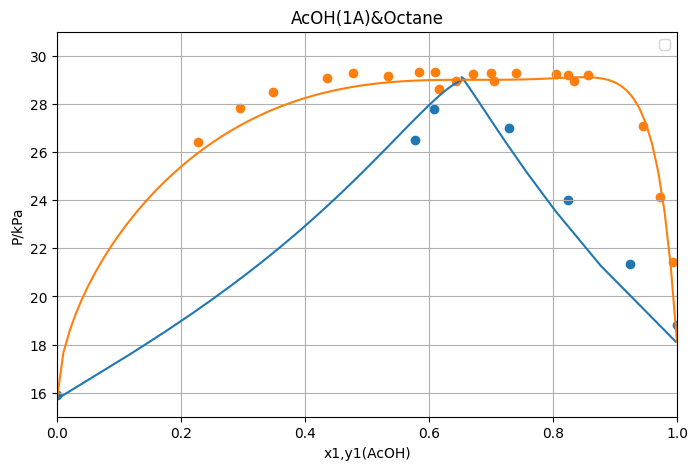

In [ ]:
T=343.15

VLE_DIAGRAM(("t",T),peq,antoine,y_label="P/kPa",x_label="x1,y1(AcOH)",y_lim=[15,31],x_figsize=8,factor=1e3,title="AcOH(1A)&Octane",exp_data=[xorv,porv,xbol,pbol],N_points=100)

In [ ]:
print(pACOH_OCT.as_string())

 === Cubic Parameters ===
  Number of Components (ncomp): 2
  a0 (va0): [0.91196, 3.4875]
  b (vb):  [4.68e-5, 0.0001424]
  kappa (c1):   [0.4644, 0.99415]
  T_crit (vtc): [594.8, 568.7]
  Binary Interaction Map (kᵢⱼ (a,b) ): {(0, 1): (0.0, 0.064)}
 === Associative Parameters ===
  Number of Components (NC): 2
  Hard-sphere Volumes (vb):
    [4.68e-5, 0.0001424]
  Epsilon Cross Matrix (εᵢⱼ):
    [40323.0, 0.0]
    [0.0, 0.0]
  Beta Cross Matrix (βᵢⱼ):
    [0.0045, 0.0]
    [0.0, 0.0]
  Association Site Matrix (Sⱼᵢ):
    [A(0.0), Null]
    [B(0.0), Null]
    [C(1.0), Null]
  Components (Self-Assoc. + Solvates): [0]
  Binary Parameters (rule and lᵢⱼ=aT+b):
    [AssocBin { lij: 0.0, rule: CR1 }, AssocBin { lij: 0.0, rule: CR1 }]
    [AssocBin { lij: 0.0, rule: CR1 }, AssocBin { lij: 0.0, rule: CR1 }]



###Ác. Propanoico + Heptano

In [ ]:
xorv = np.array([
    0.860323206205559, 0.5932794656324067, 0.3804740357681534, 0.2838375350140056,
    0.21208791208791206, 0.1750484809308338, 0.16596423184658476, 0.14479422538246067,
    0.12287868993751343, 0.10624218918336563, 0.09038138332255975, 0.07451195862960565,
    0.06017022193492781, 0.043553113553113545, 0.029965524671406993, 0.015634561516914433
])

porv = np.array([
    3.114285714285714, 4.614285714285714, 7.314285714285713, 9.414285714285715,
    11.514285714285714, 13.228571428571428, 13.914285714285713, 14.985714285714286,
    15.885714285714284, 16.785714285714285, 17.257142857142856, 17.9,
    18.15714285714286, 18.67142857142857, 18.928571428571427, 18.97142857142857
])


xbol = np.array([
    1.0, 0.9885240249946131, 0.9688407670760609, 0.9317539323421676,
    0.8909308338720102, 0.8184205990088342, 0.7421719457013574, 0.7044279250161601,
    0.6070825253178195, 0.5067442361560007, 0.40715147597500534, 0.3128571428571428,
    0.2396746390864038, 0.16424046541693593, 0.10312648136177542,
    0.06390648567119152, 0.02920491273432449,0.0
])

pbol = np.array([
    2.2142857142857117, 3.1999999999999993, 4.699999999999999, 7.357142857142854,
    9.328571428571426, 11.557142857142857, 13.14285714285714, 13.87142857142857,
    15.07142857142857, 15.799999999999999, 16.7, 17.214285714285715,
    17.814285714285713, 18.2, 18.757142857142856, 18.84285714285714,
    19.057142857142857, 19.142857142857142
])

In [ ]:
pPROPANOIC_HEPTANE=CPAParameters.from_records(
    cubic=[c_propanoic,c_heptane],
    assoc=[a_propanoic,a_heptane])

pPROPANOIC_HEPTANE.set_cubic_binary(0,1,0.0, 0.017)

PROPANOIC_HEPTANE=EquationOfState.cpa(pPROPANOIC_HEPTANE)
# print(pWATER_ACETIC.as_string())

peq=PhaseEquilibrium(PROPANOIC_HEPTANE)
# p,y,vx=vle_diagram(T,peq,factor=1e3)


In [ ]:
print(pPROPANOIC_HEPTANE.as_string())

 === Cubic Parameters ===
  Number of Components (ncomp): 2
  a0 (va0): [1.32676, 2.9178]
  b (vb):  [6.41e-5, 0.00012535]
  kappa (c1):   [0.6891, 0.9137]
  T_crit (vtc): [612.2, 540.0]
  Binary Interaction Map (kᵢⱼ (a,b) ): {(0, 1): (0.0, 0.017)}
 === Associative Parameters ===
  Number of Components (NC): 2
  Hard-sphere Volumes (vb):
    [6.41e-5, 0.00012535]
  Epsilon Cross Matrix (εᵢⱼ):
    [39975.0, 0.0]
    [0.0, 0.0]
  Beta Cross Matrix (βᵢⱼ):
    [0.0021, 0.0]
    [0.0, 0.0]
  Association Site Matrix (Sⱼᵢ):
    [A(0.0), Null]
    [B(0.0), Null]
    [C(1.0), Null]
  Components (Self-Assoc. + Solvates): [0]
  Binary Parameters (rule and lᵢⱼ=aT+b):
    [AssocBin { lij: 0.0, rule: CR1 }, AssocBin { lij: 0.0, rule: CR1 }]
    [AssocBin { lij: 0.0, rule: CR1 }, AssocBin { lij: 0.0, rule: CR1 }]



/tmp/ipython-input-55-644647522.py:146: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
/tmp/ipython-input-55-644647522.py:147: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]


`density (NaN value) at it=1` Not Converged.
`density (NaN value) at it=1` Not Converged.


/tmp/ipython-input-55-644647522.py:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


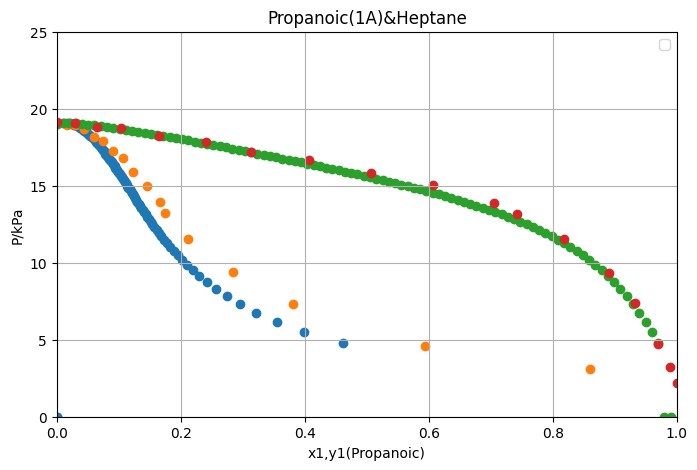

In [ ]:
T=323.15
# VLE_DIAGRAM(("t",T),peq,antoine,y_label="P/kPa",x_label="x1,y1(AcOH)",y_lim=[15,31],x_figsize=8,factor=1e3,title="AcOH(1A)&Octane",exp_data=[xorv,porv,xbol,pbol],N_points=100)

P,Xphase,Z=VLE_DIAGRAM(("t",T),peq,antoine,y_label="P/kPa",x_label="x1,y1(Propanoic)",x_figsize=8,factor=1e3,title="Propanoic(1A)&Heptane",y_lim=[0.0,25.0],exp_data=[xorv,porv,xbol,pbol],N_points=100)

In [ ]:
Xphase

array([7.40570625e-05, 1.13645557e-02, 1.66006094e-02, 2.06984048e-02,
       2.42081650e-02, 2.73432979e-02, 3.02132736e-02, 3.28830455e-02,
       3.53950569e-02, 3.77786813e-02, 4.00553346e-02, 4.22411892e-02,
       4.43488189e-02, 4.63882344e-02, 4.83675664e-02, 5.02935314e-02,
       5.21716925e-02, 5.40069535e-02, 5.58033668e-02, 5.75644985e-02,
       5.92934744e-02, 6.09930581e-02, 6.26657139e-02, 6.43136560e-02,
       6.59388894e-02, 6.75432428e-02, 6.91283958e-02, 7.06959021e-02,
       7.22472088e-02, 7.37836731e-02, 7.53065764e-02, 7.68171372e-02,
       7.83165220e-02, 7.98058551e-02, 8.12862281e-02, 8.27587072e-02,
       8.42243420e-02, 8.56841719e-02, 8.71392333e-02, 8.85904771e-02,
       9.00391271e-02, 9.14861673e-02, 9.29326892e-02, 9.43798149e-02,
       9.58287046e-02, 9.72805636e-02, 9.87366505e-02, 1.00198286e-01,
       1.01666861e-01, 1.03143849e-01, 1.04630814e-01, 1.06129423e-01,
       1.07641464e-01, 1.09168852e-01, 1.10713653e-01, 1.12278100e-01,
      

(0.0, 25.0)

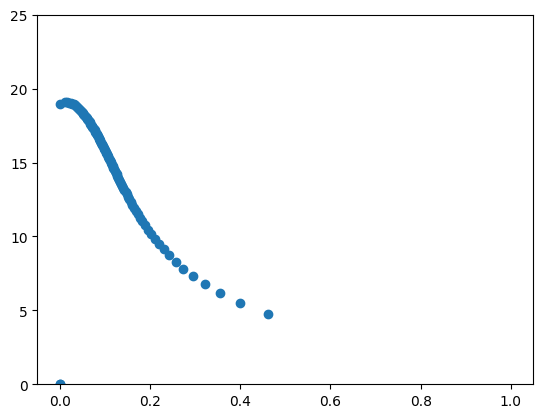

In [ ]:
plt.scatter(Xphase,P)
plt.ylim(0,25)

/tmp/ipython-input-93-2127945188.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


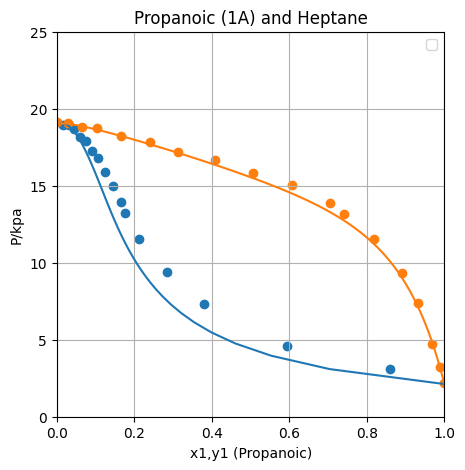

In [ ]:
# plot_vle_diagram(p,y,vx,
#                  p_label="P/kpa",
#                  x_label="x1,y1 (Propanoic)",
#                  title="Propanoic (1A) and Heptane",
#                  exp_data=[y_exp,porv,x_exp,pbol],
#                  p_lim=[0,25])

#*Ten Years with the CPA (Cubic-Plus-Association) Equation of State.Part 2. Cross-Associating and Multicomponent Systems*

###Ácido Acético + Água (SRK-CPA ECR)

In [ ]:
pWATER_ACETIC=CPAParameters.from_records(
    cubic=[c_w,c_acoh],
    assoc=[a_w,a_acoh])

pWATER_ACETIC.set_cubic_binary(0,1,0.0,-0.222)

pWATER_ACETIC.set_assoc_binary(0,1,"ecr")

WATER_ACETIC=EquationOfState.cpa(pWATER_ACETIC)

antoine=np.array([water_antoine,acoh_antoine])
peq=PhaseEquilibrium(WATER_ACETIC)
T= 313.15
# print(pWATER_ACETIC.as_string())

In [ ]:

xorv=np.array([0.0 ,
0.11182235411849956,
0.16713827254218566,
0.23011778644305642,
0.28236826667586873,
0.35151891599664126,
0.4160771593222677 ,
0.5098548374109986 ,
0.5867208438294396 ,
0.6528060549593382 ,
0.8127034519249572 ,
0.9187716392330076 ,
1.0                ,])
porv=np.array([0.04783176323084533 ,
0.052450510139526334,
0.054236631123687276,
0.05676926970104789,
0.05825678364792897,
0.06033990130784362,
0.061825574841551934,
0.06360594453454801,
0.06508977765508357,
0.06687428827771835,
0.06954196717163004,
0.07176909716231294,
0.07370107089041492,])


pbol=np.array([0.052688196007102964 ,
0.054535539946943504,
0.05705464531945333,
0.058569846941343096,
0.06058944477594773,
0.06210665938158264,
0.0642987986800578,
0.06548300826042258,
0.06683257007699664,
0.07037714688311035,
0.0722414574002315,])

xbol=np.array([0.062395306872182726,
0.10027534741942673,
0.15192994816566863,
0.20525963895698685,
0.2723567007196417,
0.3377139693882686,
0.4357462777773784,
0.5113985204569472,
0.5750303744868689,
0.7538767910163412,
0.8931321308151866,  ])


In [ ]:
a =np.linspace(0,100,100)



In [ ]:
a.n


0.0
1.0101010101010102
2.0202020202020203
3.0303030303030303
4.040404040404041
5.050505050505051
6.0606060606060606
7.070707070707071
8.080808080808081
9.090909090909092
10.101010101010102
11.111111111111112
12.121212121212121
13.131313131313131
14.141414141414142
15.151515151515152
16.161616161616163
17.171717171717173
18.181818181818183
19.191919191919194
20.202020202020204
21.212121212121215
22.222222222222225
23.232323232323235
24.242424242424242
25.252525252525253
26.262626262626263
27.272727272727273
28.282828282828284
29.292929292929294
30.303030303030305
31.313131313131315
32.323232323232325
33.333333333333336
34.343434343434346
35.35353535353536
36.36363636363637
37.37373737373738
38.38383838383839
39.3939393939394
40.40404040404041
41.41414141414142
42.42424242424243
43.43434343434344
44.44444444444445
45.45454545454546
46.46464646464647
47.47474747474748
48.484848484848484
49.494949494949495
50.505050505050505
51.515151515151516
52.525252525252526
53.535353535353536
54.54545

In [ ]:
T=300.
vle_diagram(T,peq)

[array([0.02303996, 0.02314883, 0.02326879, 0.0233998 , 0.02354167,
        0.02369414, 0.02385682, 0.02402922, 0.02421075, 0.02440071,
        0.02459835, 0.02480282, 0.02501322, 0.02522864, 0.02544811,
        0.02567066, 0.02589534, 0.02612119, 0.02634732, 0.02657285,
        0.02679698, 0.02701896, 0.02723811, 0.02745382, 0.02766553,
        0.0278728 , 0.02807521, 0.02827244, 0.02846423, 0.02865038,
        0.02883075, 0.02900524, 0.02917381, 0.02933647, 0.02949324,
        0.02964421, 0.02978946, 0.02992913, 0.03006335, 0.03019228,
        0.03031608, 0.03043495, 0.03054906, 0.0306586 , 0.03076377,
        0.03086477, 0.03096176, 0.03105496, 0.03114454, 0.03123067,
        0.03131353, 0.03139328, 0.03147008, 0.03154409, 0.03161545,
        0.03168429, 0.03175076, 0.03181495, 0.03187701, 0.03193704,
        0.03199515, 0.03205144, 0.03210603, 0.03215901, 0.03221048,
        0.03226057, 0.03230936, 0.032357  , 0.03240359, 0.03244929,
        0.03249425, 0.03253863, 0.03258265, 0.03

/tmp/ipython-input-75-3107707991.py:147: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
/tmp/ipython-input-75-3107707991.py:148: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]
/tmp/ipython-input-75-3107707991.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


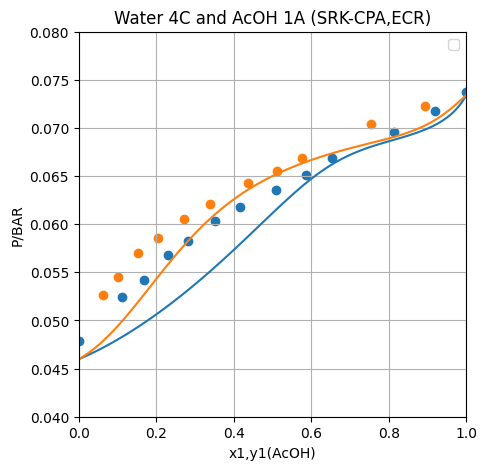

In [ ]:
# VLE_DIAGRAM(("t",T),peq,antoine,y_label="P/kPa",x_label="x1,y1(AcOH)",y_lim=[15,31],x_figsize=8,factor=1e3,title="AcOH(1A)&Octane",exp_data=[xorv,porv,xbol,pbol],N_points=100)

P,Xphase,Z=VLE_DIAGRAM(("t",T),peq,antoine,y_label="P/BAR",x_label="x1,y1(AcOH)",x_figsize=5,factor=1e5,title="Water 4C and AcOH 1A (SRK-CPA,ECR)",y_lim=[0.04,0.08],exp_data=[xorv,porv,xbol,pbol],N_points=100)

###Metanol(2B) + Ácido Acético (1A) SRK-CPA ECR T=308.15 K, kij=-0.04

In [ ]:
pMETHANOL_ACETIC=CPAParameters.from_records(
    cubic=[c_methanol,c_acoh],
    assoc=[a_methanol,a_acoh])

pMETHANOL_ACETIC.set_cubic_binary(0,1,0.0,-0.04)
# pMETHANOL_ACETIC.set_assoc_binary(0,1,"ecr")
pMETHANOL_ACETIC.set_assoc_binary(0,1,"ecr")
METHANOL_ACETIC=EquationOfState.cpa(pMETHANOL_ACETIC)
# print(pWATER_ACETIC.as_string())
peq=PhaseEquilibrium(METHANOL_ACETIC)

antoine=np.array([metoh_antoine,acoh_antoine])
T=308.15

In [ ]:
xbol=np.array([-0.0012736632222163924,
0.10119557553656855,
0.11826493711287839,
0.2160830307119626 ,
0.3511709362182816 ,
0.3899987111741204 ,
0.46302965057656004,
0.5919577265111484 ,
0.6944951972282662 ,
0.7519919941168891 ,
1.00526902344905   ,])

pbol=np.array([
    3.484189138988498,
5.337369127313252,
5.532133461710501,
7.385540889896369,
10.019521921411947,
10.897818851731959,
12.99693714320372,
16.169116699392738,
18.902488950213417,
20.61116881344625,
27.884847198319985 ,
])

xorv=np.array([
0.2856910002046959 ,
0.32912064168366156,
0.5463181277150633 ,
0.752723592336793  ,
0.7946483400680806 ,
0.8537296346557701 ,
0.9345807146160436 ,
0.9441066541322032 ,
0.9845454614375717 ,])

porv=np.array([5.328347346155887,
5.570722424812171,
7.418292229896213,
10.048785850208109,
10.878031583815385,
13.026731765009139,
16.00566325254165,
18.890283011000513,
20.550897250252085,])



/tmp/ipython-input-196-3911828227.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
/tmp/ipython-input-196-3911828227.py:169: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]
/tmp/ipython-input-196-3911828227.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


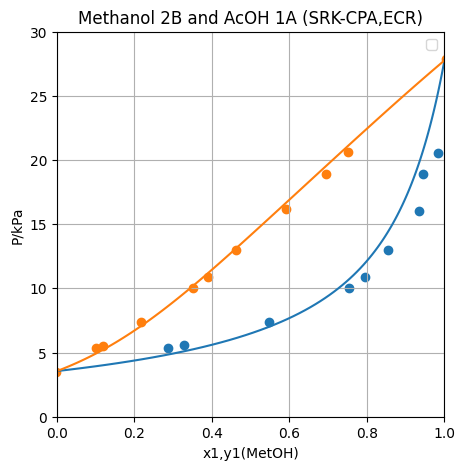

In [ ]:
P,Xphase,Z=VLE_DIAGRAM(("t",T),peq,antoine,y_label="P/kPa",x_label="x1,y1(MetOH)",y_lim=[0.0,30.0],x_figsize=5,factor=1e3,title="Methanol 2B and AcOH 1A (SRK-CPA,ECR)",exp_data=[xorv,porv,xbol,pbol],N_points=100)

### Metanol+ Octanol  SRK-CPA

In [ ]:
p=CPAParameters.from_records(
    cubic=[c_methanol_3b,c_octanol_3b],
    assoc=[a_methanol_3b,a_octanol_3b])

p.set_cubic_binary(0,1,0.0,-0.025)
p.set_assoc_binary(0,1,"ecr")
eos=EquationOfState.cpa(p)
# print(pWATER_ACETIC.as_string())
peq=PhaseEquilibrium(eos)

antoine=np.array([metoh_antoine,octanol_antoine])
P=101.32e3


In [ ]:
print(p.as_string())

 === Cubic Parameters ===
  Number of Components (ncomp): 2
  a0 (va0): [0.40531, 4.15822]
  b (vb):  [3.09e-5, 0.0001485]
  kappa (c1):   [0.431, 1.1486]
  T_crit (vtc): [513.0, 655.5]
  Binary Interaction Map (kᵢⱼ (a,b) ): {(0, 1): (0.0, -0.025)}
 === Associative Parameters ===
  Number of Components (NC): 2
  Hard-sphere Volumes (vb):
    [3.09e-5, 0.0001485]
  Epsilon Cross Matrix (εᵢⱼ):
    [24591.0, 25675.0]
    [25675.0, 26759.0]
  Beta Cross Matrix (βᵢⱼ):
    [0.0161, 0.001501332741266905]
    [0.001501332741266905, 0.00014]
  Association Site Matrix (Sⱼᵢ):
    [A(2.0), A(2.0)]
    [B(1.0), B(1.0)]
    [C(0.0), C(0.0)]
  Components (Self-Assoc. + Solvates): [0, 1]
  Binary Parameters (rule and lᵢⱼ=aT+b):
    [AssocBin { lij: 0.0, rule: CR1 }, AssocBin { lij: 0.0, rule: ECR }]
    [AssocBin { lij: 0.0, rule: ECR }, AssocBin { lij: 0.0, rule: CR1 }]



In [ ]:
p=CPAParameters.from_records(
    cubic=[c_methanol_2b,c_octanol_2b],
    assoc=[a_methanol_2b,a_octanol_2b])

p.set_cubic_binary(0,1,0.0,0.0)
p.set_assoc_binary(0,1,"cr1")
eos=EquationOfState.cpa(p)
# print(pWATER_ACETIC.as_string())
peq=PhaseEquilibrium(eos)

antoine=np.array([metoh_antoine,octanol_antoine])
P=101.32e3


####Analise da tpd

In [ ]:
z= [9.999e-01, 1.000e-04]  #NAO CONVERGE
# z=[0.2499825, 0.7500175]  # CONVERGE

In [ ]:
f,_,x,x0,xguess=tpd_root_("p",P,np.array(z),"vapor",peq,antoine)

z= [9.999e-01 1.000e-04] T0= 337.70928142109705 T= [29.78146364] xGUESS= [9.99866423e-01 1.33577300e-04] xResult= [9.99899995e-01 1.00005129e-04]


/tmp/ipython-input-26-1023632865.py:193: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
/tmp/ipython-input-26-1023632865.py:194: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]


In [ ]:
vt=np.linspace(200.0,500.,100)
vf=np.zeros_like(vt)
for i,t in enumerate(vt):

  try:
    vf[i]=f(t)

  except Exception as e:
    print(i,t)
    print(e)


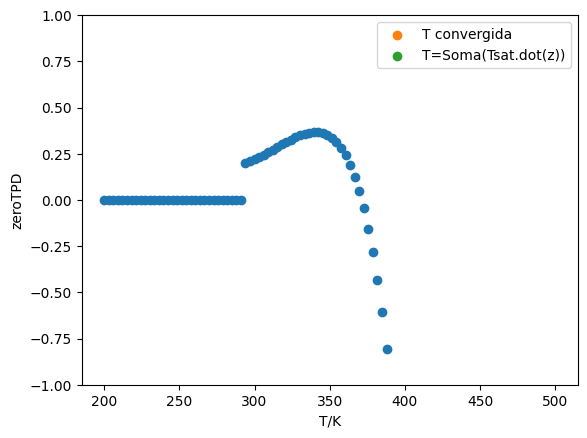

In [ ]:
# Z que converge

t_root=404.5490183
t_sugerida=422.75367355822027
y_sugerido=f(t_sugerida)

y_root=f(t_root)
plt.scatter(vt,vf)
plt.xlabel("T/K")
plt.ylabel("zeroTPD")
plt.ylim(-1.0,1.0)

plt.scatter(t_root, y_root, marker='o', label="T convergida")
plt.scatter(t_sugerida,y_sugerido, marker='o', label="T=Soma(Tsat.dot(z))")
plt.legend()
plt.show()

In [ ]:
def plot_tpd(P,z,tinf,tsup):

  f,result,x,T0,xguess=tpd_root_("p",P,np.array(z),"vapor",peq,antoine)
  t_root=result
  t_sugerida=T0
  x=np.array([x,1-x])

  vt=np.linspace(tinf,tsup,100)

  vf=np.zeros_like(vt)
  for i,t in enumerate(vt):

    try:
      vf[i]=f(t)

    except Exception as e:
      print(i,t)
      print(e)

  trivial=np.isclose(z,x)
  y_sugerido=f(t_sugerida)
  y_root=f(t_root)
  plt.scatter(vt,vf)
  plt.xlabel("T/K")
  plt.ylabel("minTPD")
  ylim=100
  plt.ylim(-ylim,ylim)
  plt.hlines(0.0,tinf,tsup)
  plt.scatter(t_root, y_root, marker='o', label="T convergida")
  plt.title(f"Trivial = {trivial}")
  plt.scatter(t_sugerida,y_sugerido, marker='o', label="T chute")
  plt.legend()
  plt.show()


/tmp/ipython-input-75-1616966549.py:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
/tmp/ipython-input-75-1616966549.py:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]


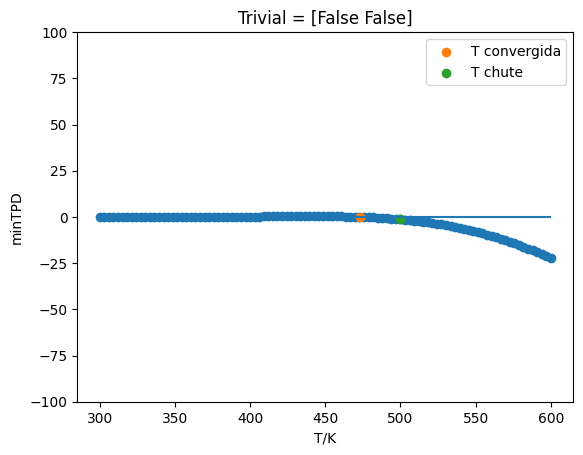

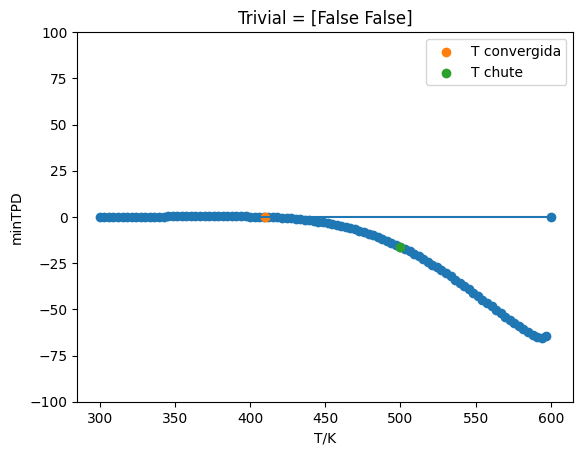

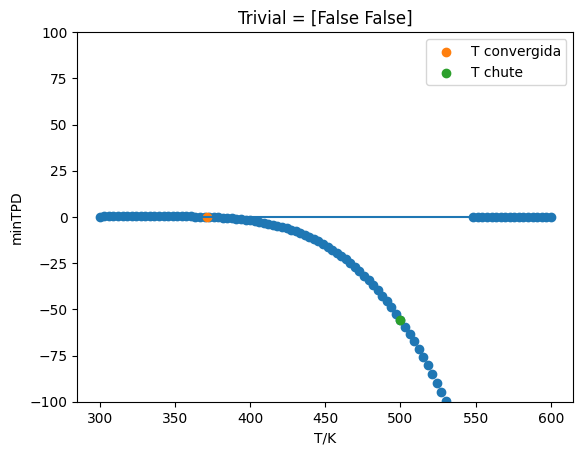

In [ ]:
# Valores de z1 a serem testados
z1_list = [0.001, 0.2, 0.9999]

# Loop sobre os valores de z1
for z1 in z1_list:
    z = np.array([z1, 1 - z1])
    plot_tpd(P, z, 300, 600)

/tmp/ipython-input-70-4073455530.py:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[0]
/tmp/ipython-input-70-4073455530.py:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)[1]


z= [0.001 0.999] T0= 300 T= [280.31156732] xGUESS= [0.5 0.5] xResult= [0.001 0.999]


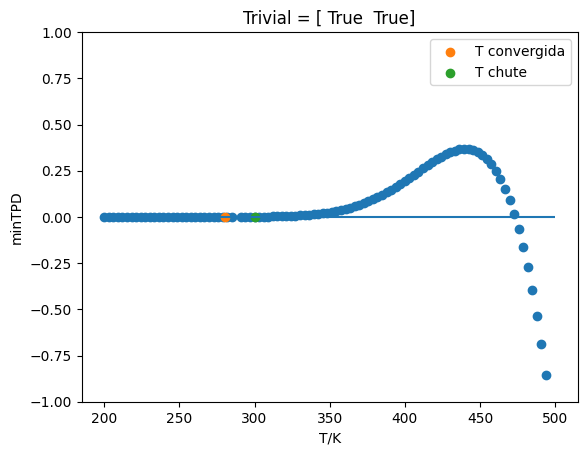

z= [0.2 0.8] T0= 300 T= [258.56328598] xGUESS= [0.5 0.5] xResult= [0.2 0.8]
29 287.8787878787879
`density (NaN value) at it=1` Not Converged.
30 290.9090909090909
`density (NaN value) at it=1` Not Converged.


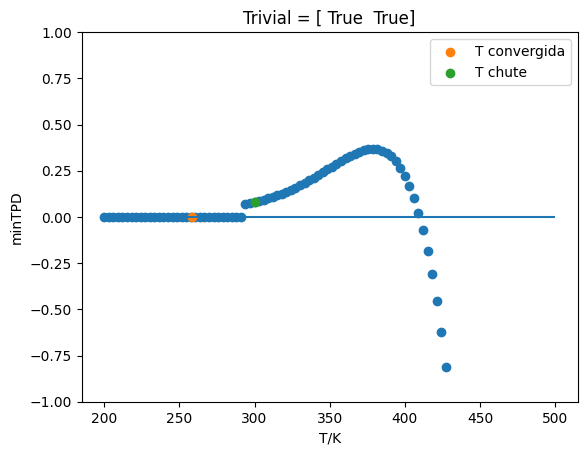

z= [0.5 0.5] T0= 300 T= [252.17579565] xGUESS= [0.5 0.5] xResult= [0.5 0.5]


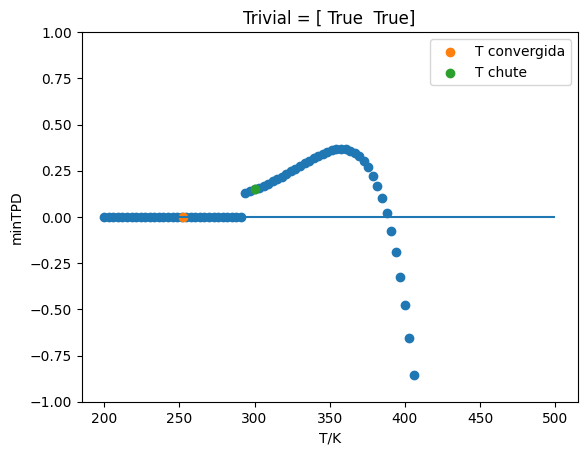

z= [0.9 0.1] T0= 300 T= [245.759811] xGUESS= [0.5 0.5] xResult= [0.89999999 0.10000001]


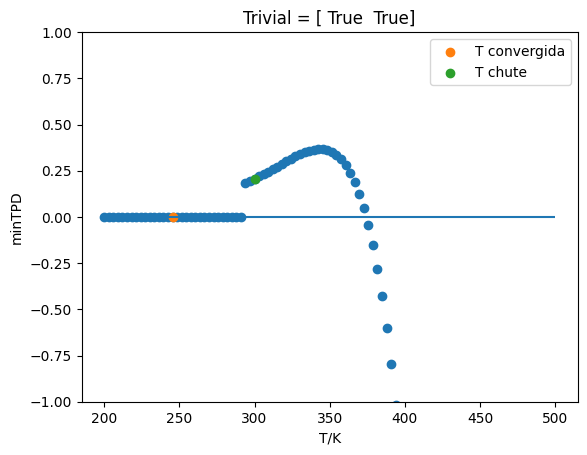

z= [9.999e-01 1.000e-04] T0= 300 T= [244.0853436] xGUESS= [0.5 0.5] xResult= [9.999e-01 1.000e-04]


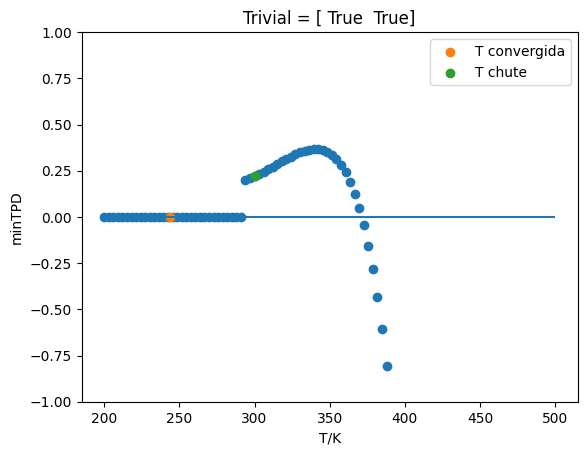

In [ ]:
# Valores de z1 a serem testados
z1_list = [0.001, 0.2, 0.5, 0.9, 0.9999]

# Loop sobre os valores de z1
for z1 in z1_list:
    z = np.array([z1, 1 - z1])
    plot_tpd(P, z, 200, 500)

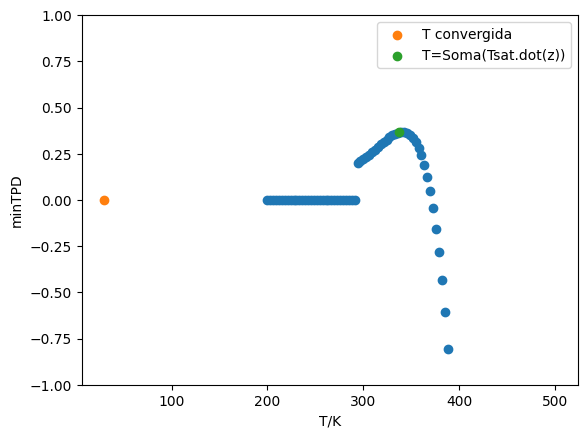

In [ ]:
t_root=29.78185236
t_sugerida=337.70928142109705

y_sugerido=f(t_sugerida)
y_root=f(t_root)
plt.scatter(vt,vf)
plt.xlabel("T/K")
plt.ylabel("minTPD")
plt.ylim(-1.0,1.0)

plt.scatter(t_root, y_root, marker='o', label="T convergida")
plt.scatter(t_sugerida,y_sugerido, marker='o', label="T=Soma(Tsat.dot(z))")
plt.legend()
plt.show()

####Plot

In [ ]:
x1 = np.array([
    0.0000, 0.0032, 0.0079, 0.0127, 0.0169, 0.0242, 0.0278, 0.0419, 0.0592, 0.1002,
    0.1477, 0.1635, 0.2064, 0.2646, 0.3662, 0.4390, 0.5053, 0.5823, 0.6433,
    0.7358, 0.8143, 0.8978, 0.9522, 0.9819, 1.0000
])
y1 = np.array([
    0.0000, 0.1564, 0.3085, 0.4072, 0.5053, 0.6062, 0.6674, 0.7691, 0.8432,
    0.9109, 0.9512, 0.9632, 0.9756, 0.9848, 0.9917, 0.9937, 0.9957, 0.9968,
    0.9973, 0.9979, 0.9987, 0.9990, 0.9992, 0.9995, 1.0000
])
T = np.array([
    467.85, 461.88, 455.06, 449.29, 444.51, 437.95, 433.78, 424.43, 414.68,
    401.33, 388.40, 383.64, 377.25, 368.40, 360.18, 355.64, 352.24, 349.62,
    347.13, 344.03, 341.99, 340.06, 338.87, 338.15, 337.75
])

/tmp/ipython-input-178-804786807.py:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-10,it_max=200)[0]
/tmp/ipython-input-178-804786807.py:199: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-10,it_max=200)[1]
/tmp/ipython-input-178-804786807.py:98: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


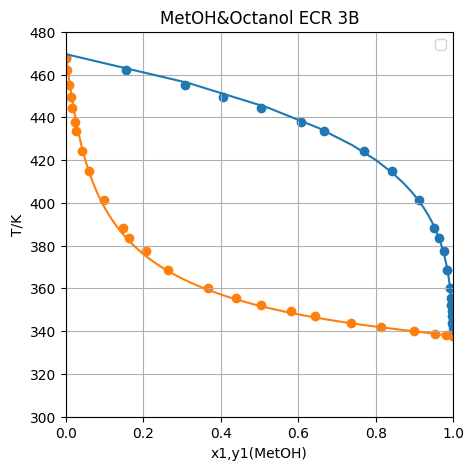

In [ ]:
t1,Xphase1,Z=VLE_DIAGRAM(("p",P),peq,antoine,y_label="T/K",x_label="x1,y1(MetOH)",y_lim=[300,480],exp_data=[y1,T,x1,T],x_figsize=5,title="MetOH&Octanol ECR 3B",N_points=100)

/tmp/ipython-input-178-804786807.py:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-10,it_max=200)[0]
/tmp/ipython-input-178-804786807.py:199: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_return_x=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-10,it_max=200)[1]
/tmp/ipython-input-178-804786807.py:98: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


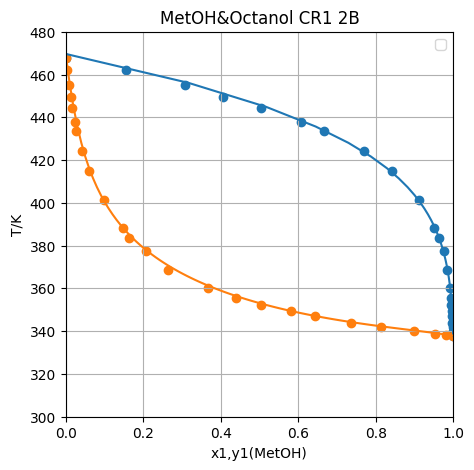

In [ ]:
t2,Xphase2,Z=VLE_DIAGRAM(("p",P),peq,antoine,y_label="T/K",x_label="x1,y1(MetOH)",y_lim=[300,480],x_figsize=5,exp_data=[y1,T,x1,T],title="MetOH&Octanol CR1 2B",N_points=100)


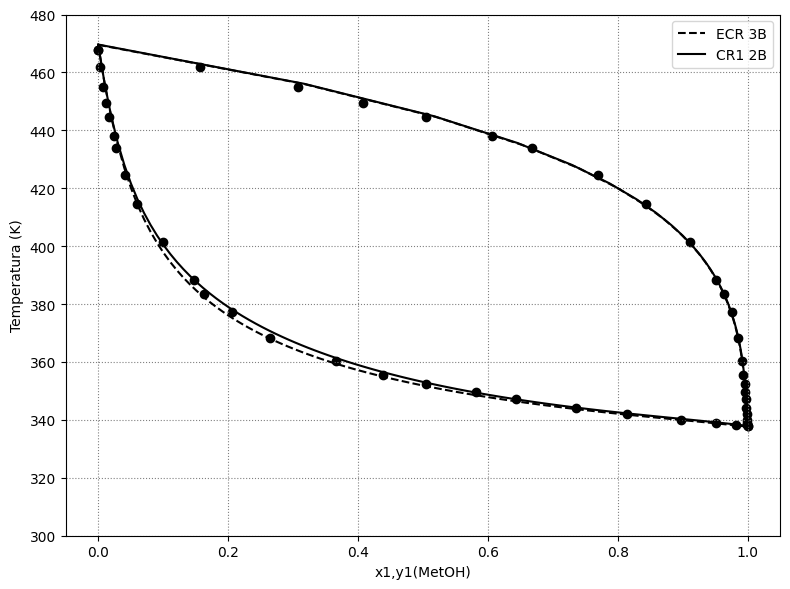

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Primeira curva (t1)
plt.plot(Xphase1, t1, "--", color="black", label="ECR 3B")
plt.plot(Z, t1, "--", color="black", )

# Segunda curva (t2)
plt.plot(Xphase2, t2, "-", color="black", label="CR1 2B")
plt.plot(Z, t2, "-", color="black")

# Eixos e formatação
plt.scatter(x1,T,color="black")
plt.scatter(y1,T,color="black")
plt.ylim(300, 480)
plt.xlabel("x1,y1(MetOH)")
plt.ylabel("Temperatura (K)")
plt.legend()
plt.grid(True, linestyle=":", color="gray")
plt.tight_layout()
plt.show()


#TPD Root

## AcOH X Agua

In [ ]:
import scipy.optimize as opt

In [ ]:
pWATER_ACETIC=CPAParameters.from_records(
    cubic=[c_w,c_acoh],
    assoc=[a_w,a_acoh])


pWATER_ACETIC.set_cubic_binary(0,1,0.0,-0.222)

pWATER_ACETIC.set_assoc_binary(0,1,"ecr")


WATER_ACETIC=EquationOfState.cpa(pWATER_ACETIC)
# print(pWATER_ACETIC.as_string())

peq_WATER_ACETIC=PhaseEquilibrium(WATER_ACETIC)
T=273.15 + 40
p,y,vx=vle_diagram(T,peq_WATER_ACETIC,factor=1e5)


x=np.array([0.6,0.4])
pbol,vy=peq_WATER_ACETIC.bbpy(T,x)

peq_WATER_ACETIC.tpd(T,pbol,x,"vapor",np.array(vy),tol=1e-6,it_max=100)

3.901880950520753e-09

In [ ]:
# def _tpd(eos,T,P,z,mother_phase):

#   if mother_phase=="vapor": daughter_phase="liquid"
#   else: daughter_phase="vapor"

#   print(mother_phase,daughter_phase)
#   _mother=State.tpx(eos,T,P,z,mother_phase)
#   _daughter=State.tpd(eos,T,P,w,daughter_phase)

#   h=_mother.ln_phi()+np.log(z)
#   g=_daughter.ln_phi()+np.log(w)
#   v=g+h

#   return w@v

# # _tpd(0,0,0,0,0,"liquid")

In [ ]:
fun=lambda X: peq_WATER_ACETIC.tpd(T,X,x,"vapor",np.array([0.5,0.5]),tol=1e-6,it_max=100)

In [ ]:
pbol

array([0.0526882 , 0.05453554, 0.05705465, 0.05856985, 0.06058944,
       0.06210666, 0.0642988 , 0.06548301, 0.06683257, 0.07037715,
       0.07224146])

In [ ]:
fun(X=979834.87804322)

1.3056222769590137e-13

In [ ]:
pbol/1e5

0.06667129245194903

In [ ]:
979834.87804322/1e5

9.7983487804322

In [ ]:



def bbpy_tpd_2comps(T,x,peq,psat):

  x0=x.dot(psat)
  yguess=(x*psat)/x0
  # yguess=np.array([0.5,0.5])
  fun=lambda X: peq.tpd(T,X,x,"vapor",yguess,tol=1e-6,it_max=100)

  # print(x0)
  # print(yguess)
  pbol=opt.root(fun,x0)

  return pbol

def tpd_root(T,z,incipient_phase,phase_equilibrium,psat):

  '''
  psat=np.array([wpsat_1(T),...,wpsat_N(T)])
  incipietn_phase: liquid or vapor
  '''


  if incipient_phase=="vapor":

    x0=z.dot(psat)
    incipient_phase_guess=(z*psat)/x0


  else:
    x0=(z.dot(1/psat))**-1
    incipient_phase_guess=x0*(z/psat)

  # print(psat)
  # print(x0,sum(incipient_phase_guess))
  fun=lambda X: phase_equilibrium.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)
  pbol=opt.root(fun,x0,method='lm' )

  # print(pbol)

  return pbol.x

def tpd_root_given_tp(T,P,y_dry_gas,phase_equilibrium):

  '''
  psat=np.array([wpsat_1(T),...,wpsat_N(T)])
  incipietn_phase: liquid or vapor
  '''

  incipient_phase="liquid"
  # # BOLHA
  # if incipient_phase=="vapor":

  #   x0=z.dot(psat)
  #   incipient_phase_guess=(z*psat)/x0

  # # ORVALHO
  # else:
  #   x0=(z.dot(1/psat))**-1
  #   incipient_phase_guess=x0*(z/psat)

  # print(psat)
  # print(x0,sum(incipient_phase_guess))

  def RES(T,P,yw):
    yw=yw[0]
    # print(yw)

    y=(y_dry_gas/y_dry_gas.sum())*(1.-yw)
    y[0]=yw
    # print(sum(y))
    # print(yw)
    s1=State.tpx(eos,T,P,y,"vapor")
    s2=State.tpx(PURE_WATER,T,P,np.array([1.0]),"liquid")
    return ( np.log(yw)+s1.ln_phi()[0] - s2.ln_phi()[0] )

  xw=0.9999
  N=len(y_dry_gas)

  incipient_phase_guess=np.zeros(N)
  incipient_phase_guess[:]=(1.0-xw)/(N-1)
  incipient_phase_guess[0]=xw
  fRES = lambda X: RES(T,P,X)

  # print("aqui")
  # print(sum(incipient_phase_guess))
  yw_guess=opt.root(fRES,[2000*1e-6]).x[0]
  # zguess=np.array([yw_guess,1-yw_guess])

  # print("guess=",yw_guess)
  def fun(v):

    # print(v)
    yw=v[0]
    Z=(y_dry_gas/y_dry_gas.sum())*(1.-yw)

    Z[0]=yw
    # print("Z=",Z)
    return phase_equilibrium.tpd(T,P,Z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)


  # print(zguess)
  yw_root=opt.root(fun,[yw_guess] )

  # print(pbol)

  return yw_root.x

In [ ]:
T=273.15 + 40
vx=np.linspace(0.00001,0.9999,100)
press_bolha=np.zeros_like(vx)

for (i,xw) in enumerate(vx):

  x=np.array([xw,1-xw])
  # pbol=bbpy_tpd_2comps(T,x,peq=peq_WATER_ACETIC,psat=np.array([wpsat(T),acoh_psat(T)])).x
  pbol=tpd_root(T,z=x,incipient_phase="vapor",phase_equilibrium=peq_WATER_ACETIC,psat=np.array([wpsat(T),acoh_psat(T)]))
  press_bolha[i]=pbol/1e5


/tmp/ipython-input-10-1226749072.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fun=lambda X: phase_equilibrium.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)
/tmp/ipython-input-13-501535648.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  press_bolha[i]=pbol/1e5


In [ ]:
T=273.15 + 40
vx=np.linspace(0.00001,0.9999,100)
press_orv=np.zeros_like(vx)
press_bolha=np.zeros_like(vx)

for (i,xw) in enumerate(vx):

  x=np.array([xw,1-xw])
  # pbol=bbpy_tpd_2comps(T,x,peq=peq_WATER_ACETIC,psat=np.array([wpsat(T),acoh_psat(T)])).x
  porv=tpd_root(T,z=x,incipient_phase="liquid",phase_equilibrium=peq_WATER_ACETIC,psat=np.array([wpsat(T),acoh_psat(T)]))
  pbol=tpd_root(T,z=x,incipient_phase="vapor",phase_equilibrium=peq_WATER_ACETIC,psat=np.array([wpsat(T),acoh_psat(T)]))

  press_bolha[i]=pbol/1e5
  press_orv[i]=porv/1e5


/tmp/ipython-input-10-1226749072.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fun=lambda X: phase_equilibrium.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)
/tmp/ipython-input-14-217828339.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  press_bolha[i]=pbol/1e5
/tmp/ipython-input-14-217828339.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  press_orv[i]=porv/1e5


In [ ]:
T=273.15 + 40
vx=np.linspace(0.00001,0.9999,100)
press_orv=np.zeros_like(vx)
press_bolha=np.zeros_like(vx)

for (i,xw) in enumerate(vx):

  x=np.array([xw,1-xw])
  pbol=tpd_root_("t",var=T,z=x,incipient_phase="vapor",peq=peq_WATER_ACETIC,antoine=np.array([water_antoine,acoh_antoine]))
  porv=tpd_root_("t",var=T,z=x,incipient_phase="liquid",peq=peq_WATER_ACETIC,antoine=np.array([water_antoine,acoh_antoine]))

  press_bolha[i]=pbol/1e5
  press_orv[i]=porv/1e5


/tmp/ipython-input-40-622876854.py:99: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=1e-6,it_max=100)
/tmp/ipython-input-45-3513215510.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  press_bolha[i]=pbol/1e5
/tmp/ipython-input-45-3513215510.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  press_orv[i]=porv/1e5


In [ ]:

yorv=np.array([0.0 ,
0.11182235411849956,
0.16713827254218566,
0.23011778644305642,
0.28236826667586873,
0.35151891599664126,
0.4160771593222677 ,
0.5098548374109986 ,
0.5867208438294396 ,
0.6528060549593382 ,
0.8127034519249572 ,
0.9187716392330076 ,
1.0                ,])

porv=np.array([0.04783176323084533 ,
0.052450510139526334,
0.054236631123687276,
0.05676926970104789,
0.05825678364792897,
0.06033990130784362,
0.061825574841551934,
0.06360594453454801,
0.06508977765508357,
0.06687428827771835,
0.06954196717163004,
0.07176909716231294,
0.07370107089041492,])


pbol=np.array([0.052688196007102964 ,
0.054535539946943504,
0.05705464531945333,
0.058569846941343096,
0.06058944477594773,
0.06210665938158264,
0.0642987986800578,
0.06548300826042258,
0.06683257007699664,
0.07037714688311035,
0.0722414574002315,])

xbol=np.array([0.062395306872182726,
0.10027534741942673,
0.15192994816566863,
0.20525963895698685,
0.2723567007196417,
0.3377139693882686,
0.4357462777773784,
0.5113985204569472,
0.5750303744868689,
0.7538767910163412,
0.8931321308151866,  ])


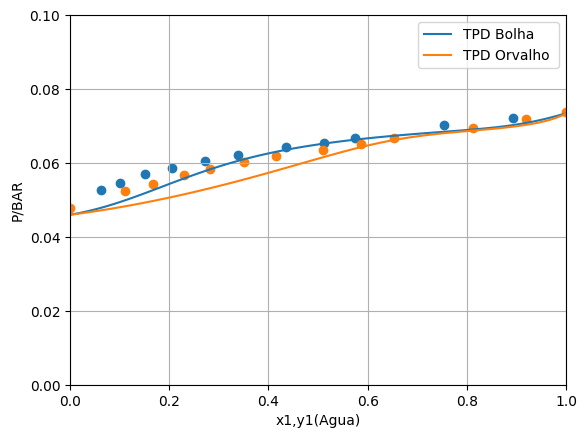

In [ ]:


plt.plot(vx,press_bolha,label="TPD Bolha")
plt.plot(vx,press_orv,label="TPD Orvalho ")
plt.scatter(xbol,pbol)
plt.scatter(yorv,porv)
plt.xlabel("x1,y1(Agua)")
plt.ylabel("P/BAR")
plt.ylim(0.00,0.1)
plt.xlim(0,1)
plt.grid()
plt.legend()

## Agua X CO2

In [ ]:

pWATER_CO2=CPAParameters.from_records(
    cubic=[c_w,c_co2],
    assoc=[a_w,a_co2])

pWATER_CO2.set_cubic_binary(0,1,kij_a=0.000877,kij_b=-0.15508)

pWATER_CO2.set_assoc_binary(0,1,"mcr1",beta=0.1836)


eos=EquationOfState.cpa(pWATER_CO2)
# print(pWATER_ACETIC.as_string())

peq_WATER_CO2=PhaseEquilibrium(eos)


# x=np.array([0.6,0.4])
# pbol,vy=peq_WATER_ACETIC.bbpy(T,x)

# peq_WATER_ACETIC.tpd(T,pbol,x,"vapor",np.array(vy),tol=1e-6,it_max=100)

In [ ]:
T=273.15 + 25


for (i,xw) in enumerate(PPM):

  xw=xw*1e-6

  x=np.array([xw,1-xw])
  print(x)
  pbol=bbpy_tpd_2comps(T,
                       x,
                       peq=peq_WATER_CO2,
                       psat=np.array(
                           [wpsat(T),
                            co2_psat(T)
                            ]
                           )
                       ).x

  press[i]=pbol/1e5


[0.002 0.998]
[0.00218182 0.99781818]
[0.00236364 0.99763636]
[0.00254545 0.99745455]
[0.00272727 0.99727273]
[0.00290909 0.99709091]
[0.00309091 0.99690909]
[0.00327273 0.99672727]
[0.00345455 0.99654545]


/tmp/ipython-input-65-2961258988.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fun=lambda X: peq.tpd(T,X,x,"vapor",yguess,tol=1e-6,it_max=100)
/tmp/ipython-input-71-841733243.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  press[i]=pbol/1e5


ValueError: `density` Not Converged.

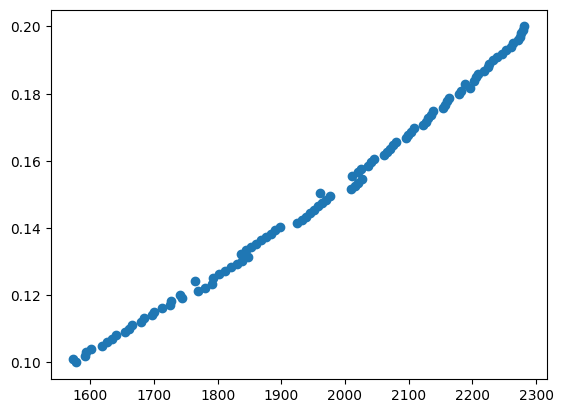

In [ ]:
# plt.scatter(vx,press,label="tpd Pbolha X x1(Agua)")
plt.scatter(press,vx)

##CO2 Puro

In [ ]:
p=CPAParameters.from_records(
    cubic=[c_w,c_co2,c_ch4],
    assoc=[a_w,a_co2,a_ch4])

p.set_cubic_binary(0,1,kij_a=0.0,kij_b=-0.147)
p.set_cubic_binary(0,2,kij_a=0.0,kij_b=0.2310)

p.set_assoc_binary(0,1,"mcr1",beta=0.1836)



eos=EquationOfState.cpa(p)


pWATER=CPAParameters.from_records(
    cubic=[c_w],
    assoc=[a_w])
PURE_WATER=EquationOfState.cpa(pWATER)
# print(pWATER_ACETIC.as_string())


pEQ=PhaseEquilibrium(eos)
# peq_WATER_CO2=PhaseEquilibrium(WATER_CO2)

In [ ]:
print(p.as_string())

 === Cubic Parameters ===
  Number of Components (ncomp): 3
  a0 (va0): [0.12277, 0.35079, 0.23204]
  b (vb):  [1.45e-5, 2.72e-5, 2.91e-5]
  kappa (c1):   [0.6736, 0.7602, 0.447]
  T_crit (vtc): [647.14, 304.12, 190.56]
  Binary Interaction Map (kᵢⱼ (a,b) ): {(0, 1): (0.0, -0.147), (0, 2): (0.0, 0.231)}
 === Associative Parameters ===
  Number of Components (NC): 3
  Hard-sphere Volumes (vb):
    [1.45e-5, 2.72e-5, 2.91e-5]
  Epsilon Cross Matrix (εᵢⱼ):
    [16655.0, 14000.0, 0.0]
    [14000.0, 0.0, 0.0]
    [0.0, 0.0, 0.0]
  Beta Cross Matrix (βᵢⱼ):
    [0.0692, 0.0007, 0.0]
    [0.0007, 0.0, 0.0]
    [0.0, 0.0, 0.0]
  Association Site Matrix (Sⱼᵢ):
    [A(2.0), A(0.0), Null]
    [B(2.0), B(1.0), Null]
    [C(0.0), C(0.0), Null]
  Components (Self-Assoc. + Solvates): [0, 1]
  Binary Parameters (rule and lᵢⱼ=aT+b):
    [AssocBin { lij: 0.0, rule: CR1 }, AssocBin { lij: 0.0, rule: EXP }, AssocBin { lij: 0.0, rule: CR1 }]
    [AssocBin { lij: 0.0, rule: EXP }, AssocBin { lij: 0.0, rule: 

In [ ]:
def RES_pure_water(X,T,P):
  yw=10**X[0]
  y=np.array([yw,1-yw])

  s1=State.tpx(eos,T,P,y,"vapor")
  s2=State.tpx(PURE_WATER,T,P,np.array([1.0]),"liquid")

  return ( np.log(yw)+s1.ln_phi()[0] - s2.ln_phi()[0] )

T=294
P=12.7e5
fRES = lambda X: RES_pure_water(X,T,P)
yw_guess=2000*1e-6
X0=np.log10( yw_guess )
RESULT=opt.root(fRES,X0).x
# 10**(ans.x)

In [ ]:
10**RESULT

array([0.00226251])

In [ ]:
def watcon(peq,T,P, yguess,xw=.9):

  def fun(X):
    yw=10**X[0]
    z=np.array([ yw,1-yw] )
    wguess = np.array([xw,1-xw])

    return peq.tpd(T,P,z,"liquid",wguess,tol=1e-6,it_max=100)

  ans = opt.root( fun, [yguess])
  # ans = opt.minimize( fun, [yguess], method="Nelder-Mead")
  return ans.x

wguess = np.array([.999,.001])
yguess=np.log10(5000*1e-6)
ans = watcon(peq_WATER_CO2,294,20e5,yguess)
(10**ans)*1e6 #ok

array([1553.67607577])

In [ ]:
[wpsat(T),co2_psat(T)]

[np.float64(3214.4428147054273), np.float64(24811751.1287633)]

In [ ]:
peq_WATER_CO2

In [ ]:
y_dry_gas=np.array([0.0,0.5,0.5])




T=294
P=12.7e5
fRES = lambda X: RES(T,P,X)
yw_guess=2000*1e-6
# X0=np.log10( yw_guess )
RESULT=opt.root(fRES,[yw_guess]).x

0.002
1.0
0.002
1.0
0.002
1.0
0.0020000000298023225
1.0
0.0021284292890256266
1.0
0.0021325416243000357
1.0
0.0021326760834365216
1.0
0.0021326762185616215
1.0
0.0021326762185659215
1.0


In [ ]:
print(RESULT)

[0.00213268]


In [ ]:
# tpd_root_given_tp(T,500e5,peq_WATER_CO2)

array([0.00520978])

In [ ]:
T=273.15 + 25
#
PRESS_BAR=np.linspace(0.1,600,100)
yw=np.zeros_like(PRESS_BAR)
# press_orv=np.zeros_like(water_PPM)
# press_bolha=np.zeros_like(water_PPM)
# y_dry_gas=np.array([0.0,0.5,0.5])
y_dry_gas=np.array([0.0,1.0,1e-20])

for (i,P_BAR) in enumerate(PRESS_BAR):

  try:
    # xw=xw*1e-6
    # z=np.array([xw,1-xw])

    P_PA=P_BAR*1e5

    # porv=tpd_root(T,z,incipient_phase="liquid",phase_equilibrium=peq_WATER_CO2,psat=np.array([wpsat(T),co2_psat(T)]))
    # porv=tpd_root(T,z,incipient_phase="liquid",phase_equilibrium=peq_WATER_CO2,psat=np.array([wpsat(T),co2_psat(T)]))
    # pbol=tpd_root(T,z,incipient_phase="vapor",phase_equilibrium=peq_WATER_CO2,psat=np.array([wpsat(T),co2_psat(T)]))

    result=tpd_root_given_tp(T,P_PA,y_dry_gas,pEQ)
    # press_bolha[i]=pbol/1e5
    # print(porv/1e5)
    # press_orv[i]=porv/1e5
    yw[i]=result[0]

  except Exception as e:
    print(e)
    pass
    continue



aqui
0.002
0.002
0.002
0.0020000000298023225
0.012130593585598806
0.03046976110596695
0.06714809614670322
0.13931109169542277
0.22104077697810867
0.285857134548299
0.31342262691356615
0.3186206065960909
0.31890943511393166
0.3189119564806244
0.3189119576364529
guess= 0.3189119576364529
[0.31891196]
Z= [3.18911958e-01 6.81088042e-01 6.81088042e-21]
[0.31891196]
Z= [3.18911958e-01 6.81088042e-01 6.81088042e-21]
[0.31891196]
Z= [3.18911958e-01 6.81088042e-01 6.81088042e-21]
[0.31891196]
Z= [3.18911962e-01 6.81088038e-01 6.81088038e-21]
[0.31890183]
Z= [3.18901828e-01 6.81098172e-01 6.81098172e-21]
[0.31890183]
Z= [3.1890183e-01 6.8109817e-01 6.8109817e-21]
aqui
0.002
0.002
0.002
0.0020000000298023225
0.004028041023503241
0.0049413657341653115
0.005440629078574772
0.005521464613733497
0.005526084498263044
0.005526120904950238
0.005526120920427967
guess= 0.005526120920427967
[0.00552612]
Z= [5.52612092e-03 9.94473879e-01 9.94473879e-21]
[0.00552612]
Z= [5.52612092e-03 9.94473879e-01 9.94473

(0.0, 600.0)

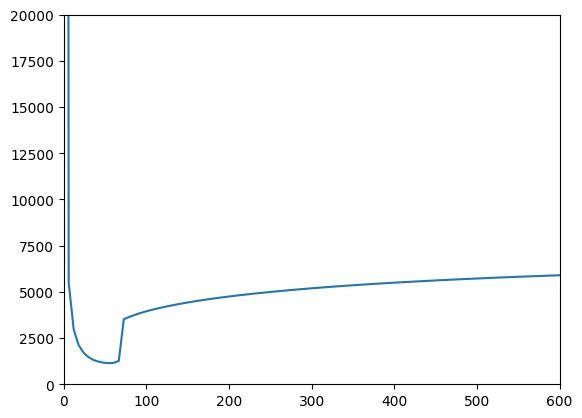

In [ ]:
plt.plot(PRESS_BAR,yw*1e6)
# vx
plt.ylim(0,20*1e3)
plt.xlim(0,600)

In [ ]:
# T=273.15 + 25
#
pres=[51.7  ,
76.   ,
101.3 ,
126.7 ,
152.  ,
177.3 ,
202.7 ]
T=298.15


# press_orv=np.zeros_like(water_PPM)
# press_bolha=np.zeros_like(water_PPM)
# y_dry_gas=np.array([0.0,0.5,0.5])
y_dry_gas=np.array([0.0,0.5,1e-8])

for (i,P_BAR) in enumerate(pres):

  try:

    P_PA=P_BAR*1e5
    result=tpd_root_given_tp(T,P_PA,y_dry_gas,pEQ)
    yw[i]=result[0]

    print("P=",P_BAR)
    print('yw=',yw[i]*1e6)

  except Exception as e:
    print(e)
    pass
    continue



P= 51.7
yw= 1151.9466440577864
P= 76.0
yw= 7145.359266095061
P= 101.3
yw= 8457.558254350766
P= 126.7
yw= 9484.499391004889
P= 152.0
yw= 10357.09019698289
P= 177.3
yw= 11132.44798494583
P= 202.7
yw= 11840.11478532415


In [ ]:
p=CPAParameters.from_records(
    cubic=[c_w,c_co2],
    assoc=[a_w,a_co2])

p.set_cubic_binary(0,1,kij_a=0.0,kij_b=-0.147)

p.set_assoc_binary(0,1,"mcr1",beta=0.1836)



eos=EquationOfState.cpa(p)


pWATER=CPAParameters.from_records(
    cubic=[c_w],
    assoc=[a_w])
PURE_WATER=EquationOfState.cpa(pWATER)
# print(pWATER_ACETIC.as_string())


pEQ=PhaseEquilibrium(eos)
# peq_WATER_CO2=PhaseEquilibrium(WATER_CO2)

In [ ]:
# T=273.15 + 25
#
pres=[51.7  ,
76.   ,
101.3 ,
126.7 ,
152.  ,
177.3 ,
202.7 ]
T=298.15


# press_orv=np.zeros_like(water_PPM)
# press_bolha=np.zeros_like(water_PPM)
# y_dry_gas=np.array([0.0,0.5,0.5])
y_dry_gas=np.array([0.0,1.0])

for (i,P_BAR) in enumerate(pres):

  try:

    P_PA=P_BAR*1e5
    result=tpd_root_given_tp(T,P_PA,y_dry_gas,pEQ)
    yw[i]=result[0]

    print("P=",P_BAR)
    print('yw=',yw[i]*1e6)

  except Exception as e:
    print(e)
    pass
    continue



P= 51.7
yw= 1151.9466596170291
P= 76.0
yw= 7145.360328563534
P= 101.3
yw= 8457.559342166895
P= 126.7
yw= 9484.500541563857
P= 152.0
yw= 10357.09141729092
P= 177.3
yw= 11132.44927638465
P= 202.7
yw= 11840.116147813227


In [ ]:
P= 51.7
yw= 1151.9466440577864
P= 76.0
yw= 7145.359266095061
P= 101.3
yw= 8457.558254350766
P= 126.7
yw= 9484.499391004889
P= 152.0
yw= 10357.09019698289
P= 177.3
yw= 11132.44798494583
P= 202.7
yw= 11840.11478532415

## Propanoic + Heptano (T de ebulição)

In [ ]:
#Fig. 7, Application of the CPA equation of state to organic acids

pPROPANOIC_HEPTANE=CPAParameters.from_records(
    cubic=[c_propanoic,c_heptane],
    assoc=[a_propanoic,a_heptane])

pPROPANOIC_HEPTANE.set_cubic_binary(0,1,0.0,  0.029)

PROPANOIC_HEPTANE=EquationOfState.cpa(pPROPANOIC_HEPTANE)
# print(pWATER_ACETIC.as_string())

peq=PhaseEquilibrium(PROPANOIC_HEPTANE)
# p,y,vx=vle_diagram(T,peq,factor=1e3)


In [ ]:
101330

101330.0


In [ ]:
P=101.33e3

vx=np.linspace(0.00001,0.9999,100)
T_orv=np.zeros_like(vx)
T_bolha=np.zeros_like(vx)

for (i,xw) in enumerate(vx):

  x=np.array([xw,1-xw])
  tbol=tpd_root_("p",var=P,z=x,incipient_phase="vapor",peq=peq, antoine=np.array([propanoic_antoine,heptane_antoine]))
  torv=tpd_root_("p",var=P,z=x,incipient_phase="liquid",peq=peq,antoine=np.array([propanoic_antoine,heptane_antoine]))

  T_bolha[i]=tbol
  T_orv[i]=torv




/tmp/ipython-input-93-2127945188.py:118: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F=lambda X: peq.tpd(X,P,z,incipient_phase,incipient_phase_guess,tol=1e-8,it_max=100)
/tmp/ipython-input-94-1310559438.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T_bolha[i]=tbol
/tmp/ipython-input-94-1310559438.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T_orv[i]=torv


In [ ]:
# orvalho

xorv=np.array([
0.0                 ,
0.014864237869629149,
0.05386962914556445 ,
0.07203659532756088 ,
0.08488809018134288 ,
0.16600947557588633 ,
0.1806476066002287  ,
0.20105080869139028 ,
0.2746740728639111  ,
0.37138376082339486 ,
0.5080267930076785  ,
0.5537239013233132  ,
0.6273393236399282  ,
0.7462153242934163  ,
0.756420192778958   ,
0.8127430158470842  ,
0.8752752818166972  ,
0.8987786309426568  ,
1.00                ,])


torv=np.array([
 371.47518379349776,
 370.82423133474924,
 371.5275935304689,
 371.5844469857866,
 371.7009246855089,
 373.5202613951968,
 374.28549583401406,
 375.28603822904756,
   378.6401829766378,
 384.11549746773403,
 392.1819702662964,
 394.9494396340467,
 397.94960300604475,
 404.0122725044927,
 404.66003594183957,
 407.07226923705275,
 409.77875510537496,
 410.7199346512008,
 414.719751674563   ,])
xbol=np.array([
0.37690965528508413,
0.4655618363012579 ,
0.6685574252573108 ,
0.7984982845940203 ,
0.8952654794968139 ,
0.9183636660676361 ,
0.9392530632249633 ,
0.9673033818003597 ,
0.9668760006534881 ,
0.9771161574906063 ,
0.984264009148832  ,
0.9900499918314    ,])

tbol=np.array([
373.5543734683875  ,
375.3138245384741,
378.5347100147035,
384.0651004737788,
392.1362783858847,
394.788420192779,
397.7358078745303,
403.92718836791374,
404.63520339813755,
406.8758830256494,
409.52990687796114 ,
410.70916516909,])

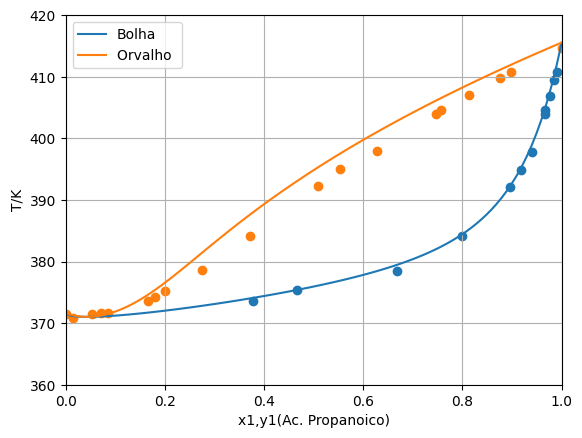

In [ ]:
plt.plot(vx,T_bolha,label="Bolha")
plt.plot(vx,T_orv,label="Orvalho ")
plt.scatter(xbol,tbol)
plt.scatter(xorv,torv)
plt.xlabel("x1,y1(Ac. Propanoico)")
plt.ylabel("T/K")
plt.ylim(360,420)
plt.xlim(0,1)
plt.grid()
plt.legend()